<a href="https://colab.research.google.com/github/YUVASRI2K/YUVASRI-21MID0225/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [67]:
df=pd.read_csv("/content/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [68]:
# Data Preprocessing
print("Initial data preview:")
print(df.head())

print("\nData information:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())


Initial data preview:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N 

In [69]:
# Handling missing values
df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Married': df['Married'].mode()[0],
    'Dependents': df['Dependents'].mode()[0],
    'Self_Employed': df['Self_Employed'].mode()[0],
    'LoanAmount': df['LoanAmount'].mean(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0],
    'Credit_History': df['Credit_History'].mode()[0]
}, inplace=True)

In [70]:
# Feature Engineering
df['loanAmount_log'] = np.log(df['LoanAmount'])
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

print("\nFeature engineering:")
print(df[['loanAmount_log', 'TotalIncome_log']].head())


Feature engineering:
   loanAmount_log  TotalIncome_log
0        4.986426         8.674026
1        4.852030         8.714568
2        4.189655         8.006368
3        4.787492         8.505323
4        4.948760         8.699515


In [72]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Credit_History'] = label_encoder.fit_transform(df['Credit_History'])

In [73]:
# Feature and target selection
features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'loanAmount_log', 'TotalIncome_log', 'Loan_Amount_Term']
x = df[features].values
y = df['Loan_Status'].values  # Ensure 'Loan_Status' is the correct target column


In [74]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [75]:
# Train RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(x_train, y_train)

# Predict and evaluate
y_pred = rf_clf.predict(x_test)



In [76]:
 # Accuracy and metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model: 77.24%

Classification Report:
              precision    recall  f1-score   support

           N       0.61      0.42      0.50        33
           Y       0.81      0.90      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.66      0.68       123
weighted avg       0.76      0.77      0.76       123


Confusion Matrix:
[[14 19]
 [ 9 81]]


In [77]:

# Cross-validation
cv_scores = cross_val_score(rf_clf, x, y, cv=5)
print(f"\nCross-validated accuracy: {cv_scores.mean()*100:.2f}%")


Cross-validated accuracy: 77.37%


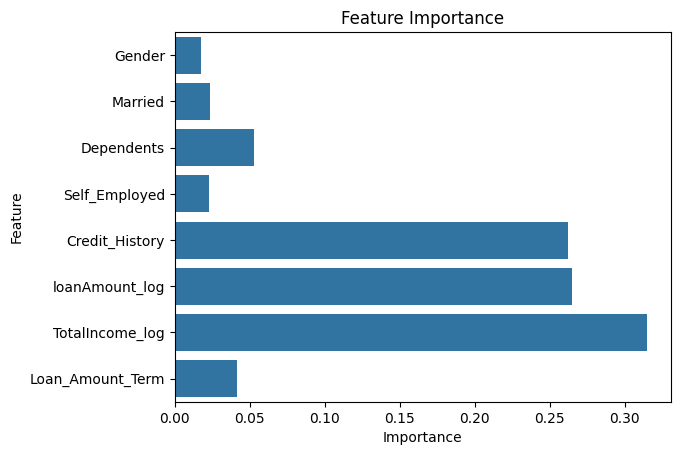

In [78]:
# Visualize feature importance
feature_importances = rf_clf.feature_importances_
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [79]:

# Predicting new data
new_data = pd.DataFrame({
    'Gender': [1],  # Example values
    'Married': [1],
    'Dependents': [0],
    'Self_Employed': [0],
    'Credit_History': [1],
    'loanAmount_log': [np.log(150000)],
    'TotalIncome_log': [np.log(50000)],
    'Loan_Amount_Term': [360]
})

# Preprocess new data
new_data = scaler.transform(new_data)

# Make prediction
new_prediction = rf_clf.predict(new_data)
print("\nLoan Approval Prediction for New Data:")
if new_prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")


Loan Approval Prediction for New Data:
Loan Not Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
